## ლექცია 14: კლასიფიკაცია. ერთ-ცვლადიანი ლოჯისტიკური რეგრესია. მრავალ-ცვლადიანი ლოჯისტიკური რეგრესია

<h2 style="color:green" align="center">Predicting if a person would buy life insurnace based on his age using logistic regression</h2>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


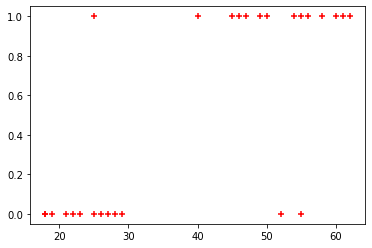

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8, random_state=20)

In [7]:
X_test

,age
13,29
4,46
1,25
10,18
26,23
12,27


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
X_test

,age
13,29
4,46
1,25
10,18
26,23
12,27


In [11]:
y_predicted = model.predict(X_test)

In [12]:
model.predict_proba(X_test)

array([[0.70382741, 0.29617259],
       [0.26682104, 0.73317896],
       [0.78702702, 0.21297298],
       [0.88891773, 0.11108227],
       [0.8216916 , 0.1783084 ],
       [0.74769265, 0.25230735]])

In [13]:
model.score(X_test,y_test)

1.0

In [14]:
y_predicted

array([0, 1, 0, 0, 0, 0], dtype=int64)

In [15]:
X_test

,age
13,29
4,46
1,25
10,18
26,23
12,27


**model.coef_ indicates value of m in y=m*x + b equation**

In [16]:
model.coef_

array([[0.11037661]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [17]:
model.intercept_

array([-4.0665126])

**Lets defined sigmoid function now and do the math with hand**

In [18]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [19]:
def prediction_function(age):
    z = 0.11 * age - 4.07 # 0.11037661 ~ 0.11 and -4.0665126 ~ -4.07
    y = sigmoid(z)
    return y

In [20]:
age = 35
prediction_function(age)

0.44522076489278517

**0.445 is less than 0.5 which means person with 35 age will *not* buy insurance**

In [21]:
age = 43
prediction_function(age)

0.6592603884513855

**0.659 is more than 0.5 which means person with 43 will buy the insurance**

<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification. 
Dataset Links: https://scikit-learn.org/stable/datasets/toy_dataset.html

Digits Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

Other sample database: https://archive.ics.uci.edu/

In [22]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

<Figure size 432x288 with 0 Axes>

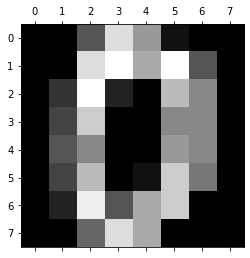

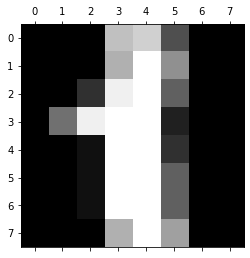

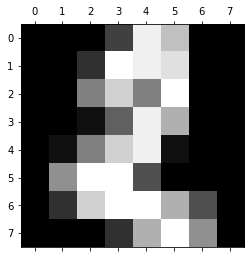

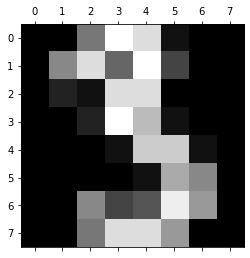

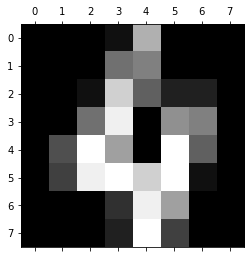

In [23]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

In [24]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [25]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [29]:
model.fit(X_train, y_train)

C:\Users\likas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [30]:
model.score(X_test, y_test)

0.9638888888888889

In [31]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [32]:
y_predicted = model.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  2,  1,  1],
       [ 0,  0,  0,  0, 47,  0,  1,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 28,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0, 49,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

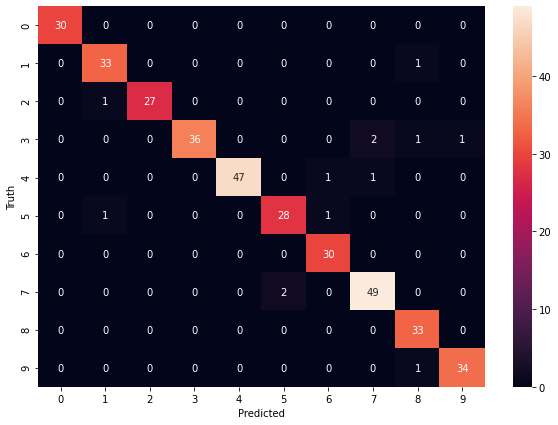

In [34]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')